<html>
<body>

<h1>tutorial #1:</h1>
<p>creating a symmetrical and balanced winding</p>
<p><img src="figure/koil_01.jpg" width="300" align="left"/></p>
<br><br>
    
<p> Selected reference:<br>
    Luigi Alberti and  Nicola Bianchi
    <em>"Theory and Design of Fractional-Slot Multilayer Windings",</em> <br>
<em>IEEE Transactions on Industry Applications, </em>
2013<i>, Vol 49</i>, pp. 841-849,  <a href="https://ieeexplore.ieee.org/document/6417023">DOI:10.1109/TIA.2013.2242031</a>  </p>    
</body>
</html>

## Create a 12-slot 10-pole 3-phase winding

In [5]:
from dolomites import koil

w = koil.m_phase_winding()
m = 3   # number of phases
Q = 12  # number of slots
p = 5   # number of pole pairs

# let ask koil to compute the symmetrical and balanced winding
w.compute_winding(m,Q,p,single_layer=False)

SHIFT 18.0
alpha_se 120.0
alpha_ph 120.0


## Post computations on the winding

In [6]:
# print the coils for each phase in the format
# coil(start,end,nc)

for _w in w.windings:
    print(_w.coils)

[coil (3, 1, -1)]
[coil (1, 2, -1)]
[coil (2, 3, -1)]


In [7]:
# compute the winding factor for the main harmonic

for _w in w.windings:
    print(_w.get_kw())

0.8660254037844388
0.8660254037844386
0.8660254037844387


In [11]:
# compute the winding factors for other harmonics

for nu in range(1,12):
    print(nu,w.windings[0].get_kw(nu))

1 0.8660254037844388
2 0.8660254037844384
3 0
4 0.8660254037844392
5 0.8660254037844387
6 0
7 0.8660254037844393
8 0.8660254037844368
9 0
10 0.8660254037844394
11 0.8660254037844367


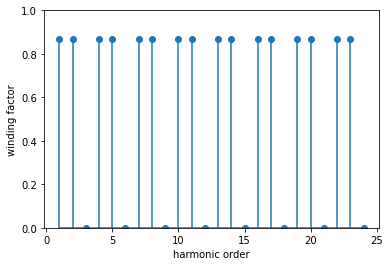

In [12]:
# make a histogram for the winding factors
# only one phase is considered
# let note that third harmoics are present in each phase

nu = []
kw = []
for _nu in range(1,25):
    nu.append(_nu)
    kw.append(w.windings[0].get_kw(_nu))

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.stem(nu,kw)
plt.ylim([0,1])
plt.xlabel('harmonic order')
plt.ylabel('winding factor');

## Get the slot matrix
The slot matrix is useful to describe the winding in finite element simulations

In [13]:
# internal representation with the actual number of conductors
# for each slot
import numpy as np
for _w in w.windings:
    print(_w.get_slot_matrix(normalize=False))


[ 1.  0. -1.]
[-1.  1.  0.]
[ 0. -1.  1.]


In [14]:
# we ask to have it in 'lua' syntax, useful for femm
# we normalize the number of conductors
# we use a custom name pattern

for i,_w in enumerate(w.windings):
    print(_w.get_slot_matrix('lua',name=chr(ord('a')+i)))   

ka = {1.0,0.0,-1.0}
kb = {-1.0,1.0,0.0}
kc = {0.0,-1.0,1.0}


In [15]:
# we ask to have it in the syntax for getdp function

for i,_w in enumerate(w.windings):
    print(_w.get_slot_matrix('getdp',name=chr(ord('a')+i)))   

ka[#1001] = 1.0;
ka[#1002] = 0.0;
ka[#1003] = -1.0;

kb[#1001] = -1.0;
kb[#1002] = 1.0;
kb[#1003] = 0.0;

kc[#1001] = 0.0;
kc[#1002] = -1.0;
kc[#1003] = 1.0;



In [16]:
# when 2-layer windings are explicitly modeled with getdp
# we can ask to have the slot matrix in specific form

for i,_w in enumerate(w.windings):
    print(_w.get_slot_matrix('getdp-2l',name=chr(ord('a')+i)))   

ka[#1001] = 0.0; ka[#2001] = 1.0;
ka[#1002] = 0.0; ka[#2002] = 0.0;
ka[#1003] = -1.0; ka[#2003] = 0.0;

kb[#1001] = -1.0; kb[#2001] = 0.0;
kb[#1002] = 0.0; kb[#2002] = 1.0;
kb[#1003] = 0.0; kb[#2003] = 0.0;

kc[#1001] = 0.0; kc[#2001] = 0.0;
kc[#1002] = -1.0; kc[#2002] = 0.0;
kc[#1003] = 0.0; kc[#2003] = 1.0;



In [17]:
# finally we can have it also in a matlab format

for i,_w in enumerate(w.windings):
    print(_w.get_slot_matrix('m-file',name=chr(ord('a')+i)))   

ka = [1.0,0.0,-1.0];
kb = [-1.0,1.0,0.0];
kc = [0.0,-1.0,1.0];


In [18]:
# we can also ask koil to provide a circuit representation
# of the winding, suitable to be adopted in getdp simulations

print(w.windings[0].get_getdp_circuit(id=100,name='a'))
print(w.windings[1].get_getdp_circuit(id=200,name='b'))
print(w.windings[2].get_getdp_circuit(id=300,name='c'))

Case Circuit_a {
    {Region #2001; Branch {100,101};}
    {Region #1003; Branch {102,101};}
    {Region #Ga; Branch {100,102};}
    }

Case Circuit_b {
    {Region #2002; Branch {200,201};}
    {Region #1001; Branch {202,201};}
    {Region #Gb; Branch {200,202};}
    }

Case Circuit_c {
    {Region #2003; Branch {300,301};}
    {Region #1002; Branch {302,301};}
    {Region #Gc; Branch {300,302};}
    }



## Consider a single layer winding

In [19]:
# we can ask, when feasible, to produce a single layer winding
w_1l = koil.m_phase_winding()
w_1l.compute_winding(m,Q,p,single_layer=True)

SHIFT 18.0
alpha_se 120.0
alpha_ph 120.0


/var/folders/4j/bl1mjqz548vg4_jktp0kpssm0000gp/T/ipykernel_5769/2039527143.py:8: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax.stem(nu,kw_1l,'ro',markerfmt='ro',label='1-layer')


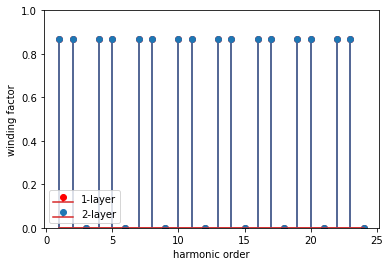

In [20]:
# we can now compare winding factors of 1- and 2-layer windings

kw_1l = []
for _nu in nu:
    kw_1l.append(w_1l.windings[0].get_kw(_nu))

fig, ax = plt.subplots()
ax.stem(nu,kw_1l,'ro',markerfmt='ro',label='1-layer')
ax.stem(nu,kw,label='2-layer')
plt.ylim([0,1])
ax.legend()
plt.xlabel('harmonic order')
plt.ylabel('winding factor');


## Inspect and plot the star of slots


In [21]:
w.star


              Sos: (m: 3, Q: 3, p: 1, t: 1, yq: 1)
              Spokes: [Spoke 1: angle 18.0, Spoke 2: angle 137.99999999999997, Spoke 3: angle 258.0]
              Positive sectors: [Sector, start: 60.00000000000001, end: 119.99999999999999, slots: [], Sector, start: 180.0, end: 239.99999999999997, slots: [], Sector, start: 299.99999999999994, end: 360.0, slots: []]
              Negative sectors: [Sector, start: 240.00000000000003, end: 299.99999999999994, slots: [3], Sector, start: 0.0, end: 59.999999999999986, slots: [1], Sector, start: 119.99999999999997, end: 180.0, slots: [2]]
              

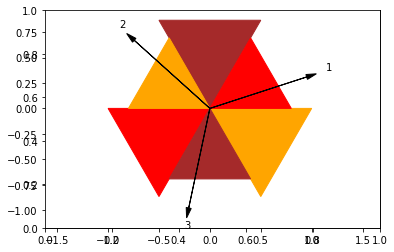

In [22]:
w.star.plot()


In [23]:
# let print the coils again to check correspndance with the sos

for _w in w.windings:
    print(_w.coils)

[coil (3, 1, -1)]
[coil (1, 2, -1)]
[coil (2, 3, -1)]


In [24]:
w.star




              Sos: (m: 3, Q: 3, p: 1, t: 1, yq: 1)
              Spokes: [Spoke 1: angle 18.0, Spoke 2: angle 137.99999999999997, Spoke 3: angle 258.0]
              Positive sectors: [Sector, start: 60.00000000000001, end: 119.99999999999999, slots: [], Sector, start: 180.0, end: 239.99999999999997, slots: [], Sector, start: 299.99999999999994, end: 360.0, slots: []]
              Negative sectors: [Sector, start: 240.00000000000003, end: 299.99999999999994, slots: [3], Sector, start: 0.0, end: 59.999999999999986, slots: [1], Sector, start: 119.99999999999997, end: 180.0, slots: [2]]
              

SHIFT 18.0
alpha_se 30.0
alpha_ph 30.0


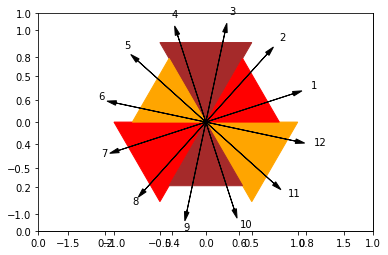

In [27]:
from dolomites import koil

w = koil.m_phase_winding()
m = 3   # number of phases
Q = 24  # number of slots
p = 2  # number of pole pairs

# let ask koil to compute the symmetrical and balanced winding
w.compute_winding(m,Q,p,single_layer=False)
w.star.plot()

In [28]:
# let print the coils again to check correspndance with the sos

for _w in w.windings:
    print(_w.coils)

[coil (3, 9, 1), coil (4, 10, 1), coil (15, 21, 1), coil (16, 22, 1), coil (9, 15, -1), coil (10, 16, -1), coil (21, 3, -1), coil (22, 4, -1)]
[coil (7, 13, 1), coil (8, 14, 1), coil (19, 1, 1), coil (20, 2, 1), coil (1, 7, -1), coil (2, 8, -1), coil (13, 19, -1), coil (14, 20, -1)]
[coil (11, 17, 1), coil (12, 18, 1), coil (23, 5, 1), coil (24, 6, 1), coil (5, 11, -1), coil (6, 12, -1), coil (17, 23, -1), coil (18, 24, -1)]
